In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


# **Import Library**

In [4]:
import pandas as pd
import numpy as np
import itertools
    


# **Import DataSets**

In [5]:
df_movies=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df_credits=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')


# **View Datasets**

In [6]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:

df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Overview The Datasets****

In [8]:
df_movies['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

# Vector Space Model****

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(stop_words='english')
df_movies['overview']  = df_movies['overview'].fillna("")

In [11]:
#fit.transfer()

In [12]:
tfidf_matrix = tfidf.fit_transform(df_movies['overview'])

# Calculating Cosine Similarity

In [13]:
from sklearn.metrics.pairwise import linear_kernel

In [14]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [15]:
indices = pd.Series(df_movies.index , index = df_movies['original_title']).drop_duplicates()
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [16]:
indices['The Dark Knight Rises']

3

In [17]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = enumerate(cosine_sim[idx])
    recommendations = []

    for i, score in sim_scores:
        recommendations.append((i, score))
    recommendations.sort(key=lambda x: x[1], reverse=True)

    for i, score in recommendations[1:11]:
        print(i, score)


In [18]:
x = df_credits['title'].head(10)
y = df_credits['movie_id'].head(10)

In [19]:
x , y


(0                                      Avatar
 1    Pirates of the Caribbean: At World's End
 2                                     Spectre
 3                       The Dark Knight Rises
 4                                 John Carter
 5                                Spider-Man 3
 6                                     Tangled
 7                     Avengers: Age of Ultron
 8      Harry Potter and the Half-Blood Prince
 9          Batman v Superman: Dawn of Justice
 Name: title, dtype: object,
 0     19995
 1       285
 2    206647
 3     49026
 4     49529
 5       559
 6     38757
 7     99861
 8       767
 9    209112
 Name: movie_id, dtype: int64)

In [20]:
import matplotlib.pyplot as plt

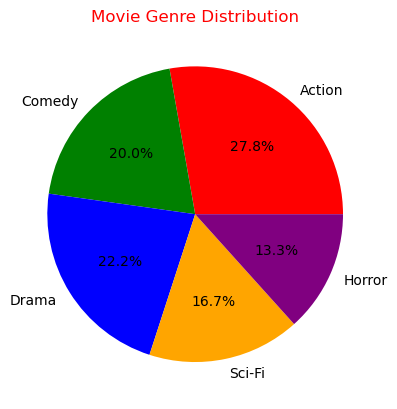

In [31]:
import matplotlib.pyplot as plt

x = ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Horror']
y = [25, 18, 20, 15, 12]

# Plotting a pie chart
plt.pie(y, labels=x, colors=['red', 'green', 'blue', 'orange', 'purple'], autopct='%1.1f%%')

plt.title("Movie Genre Distribution", color="red")

plt.show()


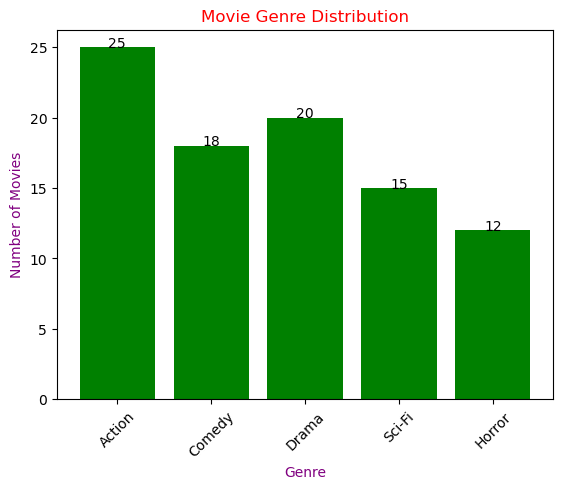

In [30]:
import matplotlib.pyplot as plt

x = ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Horror']
y = [25, 18, 20, 15, 12]

# Plotting a bar chart
plt.bar(x, y, color='green')

plt.xlabel("Genre", color="purple")
plt.ylabel("Number of Movies", color="purple")
plt.title("Movie Genre Distribution", color="red")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels to the bars
for i, v in enumerate(y):
    plt.text(i, v, str(v), color='black', ha='center')

plt.show()


# Perform Recommendations 

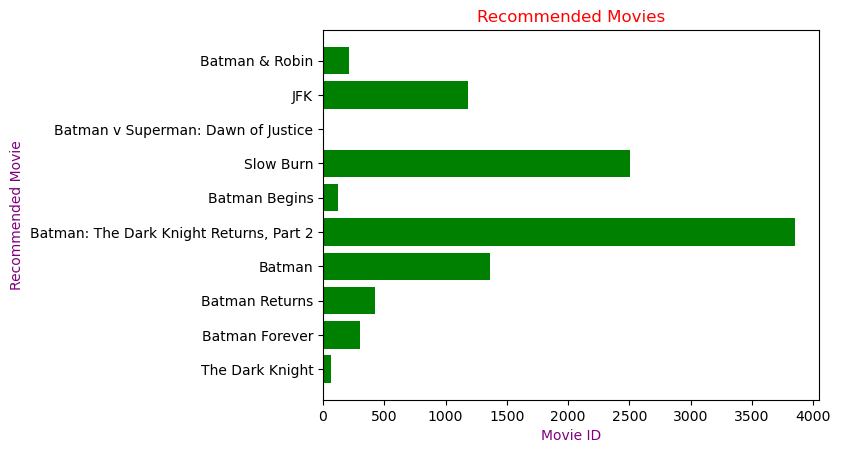

In [51]:
import matplotlib.pyplot as plt

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = enumerate(cosine_sim[idx])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    sim_index = [i[0] for i in sim_scores]
    recommended_movies = df_movies['original_title'].iloc[sim_index]
    # Create a bar chart to visualize the recommended movies with their IDs
    plt.barh(recommended_movies, sim_index, color='green')
    plt.xlabel("Movie ID", color="purple")
    plt.ylabel("Recommended Movie", color="purple")
    plt.title("Recommended Movies", color="red")
    plt.show()

get_recommendations('The Dark Knight Rises')


In [26]:
matrix_rec_movie = get_recommendations('The Matrix')
matrix_rec_movie_Id = matrix_rec_movie

1281                  Hackers
2996                 Commando
2088                    Pulse
1341         Obitaemyy Ostrov
333             Transcendence
0                      Avatar
261     Live Free or Die Hard
775                 Supernova
125       The Matrix Reloaded
2614          The Love Letter
Name: original_title, dtype: object


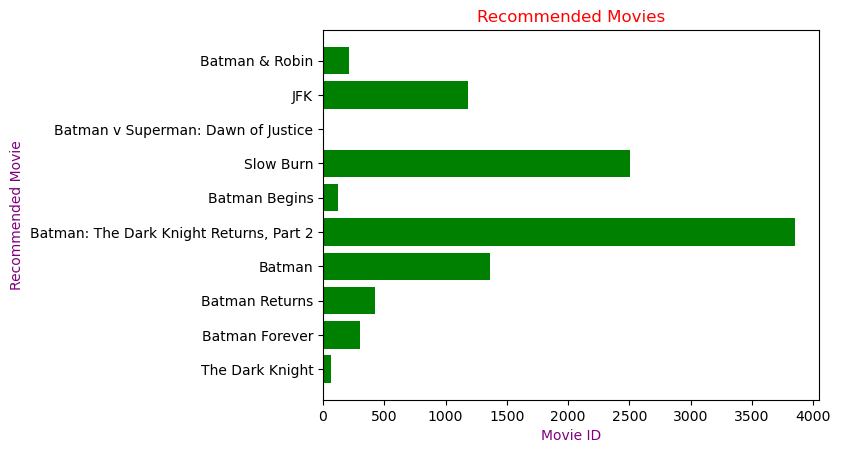

In [39]:
import matplotlib.pyplot as plt

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = enumerate(cosine_sim[idx])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    sim_index = [i[0] for i in sim_scores]
    recommended_movies = df_movies['original_title'].iloc[sim_index]
    
    # Create a bar chart to visualize the recommended movies with their IDs
    plt.barh(recommended_movies, sim_index, color='green')
    plt.xlabel("Movie ID", color="purple")
    plt.ylabel("Recommended Movie", color="purple")
    plt.title("Recommended Movies", color="red")
    plt.show()

get_recommendations('The Dark Knight Rises')


In [28]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341                Obitaemyy Ostrov
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: original_title, dtype: object


In [46]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = enumerate(cosine_sim[idx])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    sim_index = [i[0] for i in sim_scores]
    recommended_movies = df_movies['original_title'].iloc[sim_index]

    # Create a bar chart to visualize the recommended movies with their IDs
   


# Thank You !

In [50]:
   

get_recommendations('Hanna')